# .csv to .lse

Goal: convert vertical hourly strip (.csv) into .lse / batch .lse file that can be uploaded to PE.

### Import modules (use conda env la-tools)

In [3]:
! conda init bash

no change     /opt/tljh/user/condabin/conda
no change     /opt/tljh/user/bin/conda
no change     /opt/tljh/user/bin/conda-env
no change     /opt/tljh/user/bin/activate
no change     /opt/tljh/user/bin/deactivate
no change     /opt/tljh/user/etc/profile.d/conda.sh
no change     /opt/tljh/user/etc/fish/conf.d/conda.fish
no change     /opt/tljh/user/shell/condabin/Conda.psm1
no change     /opt/tljh/user/shell/condabin/conda-hook.ps1
no change     /opt/tljh/user/lib/python3.6/site-packages/xontrib/conda.xsh
no change     /opt/tljh/user/etc/profile.d/conda.csh
no change     /home/jupyter-engiela/.bashrc
No action taken.


In [4]:
! conda activate la-tools


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [5]:
import cx_Oracle
import db_connect
import pandas as pd
import numpy as np
import datetime as dt
import logging
import requests
import flask
import json
import math
import time
import sys
import os

In [6]:
base = os.getcwd()
print('working in {}.'.format(base))

working in /home/jupyter-engiela/LA-tools/package.


## IDR

In [17]:
hor_idr = pd.read_csv('CLP_51328633000_660162009_IDR.csv')
hor_idr.set_index(['Date'], drop = True, inplace = True)

In [18]:
row_name = []

for i, acct in enumerate(hor_idr.Account):
    row = 1000000 + i
    row = str(row)
    
    row_name.append(row)

In [36]:
hor_idr['Channel'] = row_name
hor_idr.set_index(['Channel'], drop = True, inplace = True)
accts = np.unique(hor_idr['Account'])
acct = accts[0]
#hor_idr.drop('Account', inplace = True)

#hor_idr.drop([['Account', 'kwh']])

In [42]:
hor_idr.drop(['Account', 'Units'], inplace = True, errors = 'coerce')

KeyError: "['Account' 'Units'] not found in axis"

In [46]:
new_hor_idr = hor_idr.iloc[:,2:]

In [47]:
new_hor_idr

,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00
Channel,,,,,,,,,,,,,,,,,,,,,
1000000,132.9408,128.8512,133.6896,137.1456,145.4400,174.0096,171.4176,198.4320,215.1360,179.7696,...,186.5664,186.2208,173.9520,164.0448,162.2592,161.2800,157.5360,143.7120,134.3232,132.4800
1000001,133.9200,133.4592,134.0928,135.2448,145.8432,177.0048,183.3408,205.0560,217.0944,220.6656,...,215.9424,214.0992,202.3488,195.9552,197.3376,191.6928,187.8912,163.5840,158.9760,172.9728
1000002,172.6848,172.6272,172.6848,171.9360,187.7184,239.2128,254.1312,264.0384,258.5664,267.2640,...,250.8480,228.9600,209.8368,197.4528,199.8720,195.6672,199.5264,163.8144,151.4304,144.2880
1000003,137.7216,133.6896,133.4016,132.2496,144.3456,178.5024,189.9648,218.9952,232.0128,231.6672,...,200.1024,195.4368,184.0896,174.8736,172.0512,165.8304,165.0816,145.8432,135.7632,132.9984
1000004,132.4224,132.8256,133.9200,132.6528,147.5136,169.6896,182.9952,215.4816,220.0896,214.6176,...,193.0752,192.1536,175.5648,166.1760,167.2704,165.3696,164.1024,149.1840,137.8944,139.4496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000394,97.9200,97.8624,97.2864,98.0928,106.6752,126.3744,128.5632,150.5088,153.7920,144.7488,...,126.2592,113.6448,115.4880,113.4144,108.8640,103.0464,100.2816,101.4336,100.0512,94.4064
1000395,92.8512,103.3920,99.5328,77.6448,93.3696,110.2464,120.2688,140.6592,149.7600,171.8208,...,129.6000,132.5952,126.7200,124.2432,124.3584,118.1376,119.0016,126.4320,117.6768,111.3984
1000396,111.6864,110.7072,110.5344,109.5552,122.1120,139.7952,133.9200,153.7920,164.0448,162.7200,...,134.7264,130.2336,127.2384,122.1696,123.0912,121.2480,118.4256,121.0176,117.9648,107.4240


In [98]:
strip = new_hor_idr.iloc[0,:]

In [59]:
colnames = list(new_hor_idr.columns)

In [82]:
time = [dt.datetime.strptime(c, '%H:%M') for c in colnames[:23]]
midnight = time[0] - dt.timedelta(hours = 1)

time.append(midnight)

In [83]:
qs = (time[1] - time[0])/4

In [108]:
qs = (time[1] - time[0])/4
new_time = []

for t in time:
    for i in range(0,3):
        new_time.append(t+i*qs)
        

In [101]:
strip[0]

132.9408

In [109]:
new_val = []
hr = [a.minute == 0 for a in new_time]
strip = new_hor_idr.iloc[0,:]

for i, h in enumerate(hr):
    if h:
        new_val.append(strip[(int(i/4))])
    else:
        new_val.append('')

In [110]:
new_val

[132.9408,
 '',
 '',
 132.9408,
 '',
 '',
 128.8512,
 '',
 '',
 133.6896,
 '',
 '',
 137.1456,
 '',
 '',
 137.1456,
 '',
 '',
 145.44,
 '',
 '',
 174.0096,
 '',
 '',
 171.4176,
 '',
 '',
 171.4176,
 '',
 '',
 198.432,
 '',
 '',
 215.136,
 '',
 '',
 179.7696,
 '',
 '',
 179.7696,
 '',
 '',
 217.728,
 '',
 '',
 218.1312,
 '',
 '',
 210.0672,
 '',
 '',
 210.0672,
 '',
 '',
 198.0864,
 '',
 '',
 186.5664,
 '',
 '',
 186.2208,
 '',
 '',
 186.2208,
 '',
 '',
 173.952,
 '',
 '',
 164.0448,
 '',
 '']

### Read in data

In [15]:
csv_data = pd.read_csv('CLP_51328633000_660162009_IDR_vert.csv', header = None)

csv_data.columns = ['t', 'v']
csv_data['t'] = pd.to_datetime(csv_data['t'])
csv_data['v'] = pd.to_numeric(csv_data['v'])
csv_data.set_index(['t'], drop = True, inplace = True)

print(csv_data.head())
print("...")
print(csv_data.tail())

                            v
t                            
2018-09-24 00:00:00  132.4800
2018-09-24 01:00:00  132.9408
2018-09-24 02:00:00  128.8512
2018-09-24 03:00:00  133.6896
2018-09-24 04:00:00  137.1456
...
                            v
t                            
2019-10-27 19:00:00   99.7056
2019-10-27 20:00:00   95.8464
2019-10-27 21:00:00   96.0192
2019-10-27 22:00:00   97.8624
2019-10-27 23:00:00  106.5024


### Plot

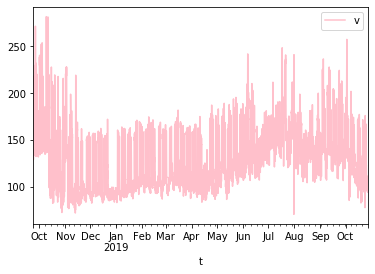

In [10]:
csv_data.plot(y = 'v', color = 'pink')

## Convert .csv to .lse

In [18]:
with open('NEPOOL_CLP_51328633000_660162009_20191028140719.lse', 'r') as f:
    f = f.read()

In [50]:
f

'00000001,NEPOOL_CLP_51328633000_660162009,1,20180924000000,20191027235900,N,N\n00000002,0,0,0,0,1,0,3600,1,0,,0,0,\n00000003,NEPOOL_CLP_51328633000_660162009,\n00000004,20191028140719,M\n10000000,132.48,,,132.9408,,,128.8512,,,133.6896,,,137.1456,,,145.44,,,174.0096,,,171.4176,,,198.432,,,215.136,,,179.7696,,,217.728,,,218.1312,,,210.0672,,,198.0864,,,186.5664,,,186.2208,,,173.952,,,164.0448,,,162.2592,,,161.28,,,157.536,,,143.712,,,134.3232,,,172.9728,,,133.92,,,133.4592,,,134.0928,,,135.2448,,,145.8432,,,177.0048,,,183.3408,,,205.056,,,217.0944,,,220.6656,,,218.9952,,,229.4784,,,223.2576,,,213.408,,,215.9424,,,214.0992,,,202.3488,,,195.9552,,,197.3376,,,191.6928,,,187.8912,,,163.584,,,158.976,,,144.288,,,172.6848,,,172.6272,,,172.6848,,,171.936,,,187.7184,,,239.2128,,,254.1312,,,264.0384,,,258.5664,,,267.264,,,270.2016,,,271.5264,,,263.8656,,,256.608,,,250.848,,,228.96,,,209.8368,,,197.4528,,,199.872,,,195.6672,,,199.5264,,,163.8144,,,151.4304,,\n10000001,132.9984,,,137.7216,,,133.6

In [22]:
lse_data = f.split('\n')
lse_data

['00000001,NEPOOL_CLP_51328633000_660162009,1,20180924000000,20191027235900,N,N',
 '00000002,0,0,0,0,1,0,3600,1,0,,0,0,',
 '00000003,NEPOOL_CLP_51328633000_660162009,',
 '00000004,20191028140719,M',
 '10000000,132.48,,,132.9408,,,128.8512,,,133.6896,,,137.1456,,,145.44,,,174.0096,,,171.4176,,,198.432,,,215.136,,,179.7696,,,217.728,,,218.1312,,,210.0672,,,198.0864,,,186.5664,,,186.2208,,,173.952,,,164.0448,,,162.2592,,,161.28,,,157.536,,,143.712,,,134.3232,,,172.9728,,,133.92,,,133.4592,,,134.0928,,,135.2448,,,145.8432,,,177.0048,,,183.3408,,,205.056,,,217.0944,,,220.6656,,,218.9952,,,229.4784,,,223.2576,,,213.408,,,215.9424,,,214.0992,,,202.3488,,,195.9552,,,197.3376,,,191.6928,,,187.8912,,,163.584,,,158.976,,,144.288,,,172.6848,,,172.6272,,,172.6848,,,171.936,,,187.7184,,,239.2128,,,254.1312,,,264.0384,,,258.5664,,,267.264,,,270.2016,,,271.5264,,,263.8656,,,256.608,,,250.848,,,228.96,,,209.8368,,,197.4528,,,199.872,,,195.6672,,,199.5264,,,163.8144,,,151.4304,,',
 '10000001,132.9984,,,

## Make header

In [51]:
meter = 'NEPOOL_CLP_51328633000_660162009'
today = dt.datetime.today()
header = []

a = ",".join([meter, '1', '0', '','0', '0'])
b = ",".join(['0', '0', '0', '0', '1', '0', '3600','1', '0', '', '0', '0'])
b = ",".join(['0', '0', '0', '0', '1', '0', '3600','1', '0', '', '0', '0'])
ts = ''.join([str(today.year), str(today.month), str(today.day), str(today.hour), str(today.minute), str(today.second)])

row = ",".join(['00000001', a])
row2 = ",".join(['00000002', b])
row3 = ",".join(['00000003', c])
row4 = ",".join(['00000004', ts, 'M'])

header.append(row)
header.append(row2)
header.append(row3)
header.append(row4)

In [52]:
header

['00000001,NEPOOL_CLP_51328633000_660162009,1,0,,0,0',
 '00000002,0,0,0,0,1,0,3600,1,0,,0,0',
 '00000003,NEPOOL_CLP_51328633000_660162009,',
 '00000004,20191029144638,M']

In [53]:
test_head = "\n".join(header)
test_head

'00000001,NEPOOL_CLP_51328633000_660162009,1,0,,0,0\n00000002,0,0,0,0,1,0,3600,1,0,,0,0\n00000003,NEPOOL_CLP_51328633000_660162009,\n00000004,20191029144638,M'

## Make body